In [1]:
%load_ext tensorboard 

In [1]:
import pandas as pd

In [42]:
df = pd.read_csv('output/cdli_catalogue_data.csv')

In [5]:
df['era'].value_counts(dropna = False)

early_bronze       36634
iron               30800
mid_late_bronze    29689
NaN                 6375
Name: era, dtype: int64

In [8]:
df[df['era'].isna()]['period_normed'].value_counts()

uncertain               355
fake                     99
Pre-Uruk V               78
Uruk V                   46
Early Neo-Babylonian     11
Egyptian 0                2
Sassanian                 1
copy                      1
Name: period_normed, dtype: int64

In [9]:
CATALOGUE_FN='output/cdli_catalogue_data.csv'

In [92]:
df2=pd.read_csv(
            CATALOGUE_FN, usecols=['id_text','era', 'period_normed'], dtype={'id_text': object}
        ).dropna(subset=['era']).set_index('id_text').to_dict()['period_normed']

In [49]:
df2=pd.read_csv(
            CATALOGUE_FN)

In [105]:
set(['000713']) & set(pd.read_csv(
            CATALOGUE_FN, usecols=['id_text', 'era'], dtype={'id_text': object}
        ).dropna(subset=['era']).set_index('id_text').to_dict()['era'].keys())

{'000713'}

In [87]:
df2['id_text'] = ['0'+x if len(x)==5 else x for x in ['00'+x if len(x)==4 else x for x in ['000'+str(x) if len(str(x))==3 else str(x) for x in df2['id_text']]]]

In [88]:
df2.to_csv('output/cdli_catalogue_data.csv', index = False)

In [74]:
'000'+(df3['id_text'][0])

'000713'

In [25]:
set(df3['era'])

{'early_bronze', 'iron', 'mid_late_bronze'}

In [48]:
import os
import glob
x = glob.glob(os.path.join('output/images', '*.png'))

In [ ]:
    def __getitem__(self, idx):
        fn = self.img_fns[idx]
        ID = self.IDS[idx]
        period = self.id2period[ID]
        img = np.asarray(Image.open(fn))
        img = img.astype(np.float32) / 255
        if self.mask:
            img = (img > 0).astype(np.float32)
        return img, self.PERIOD_INDICES.get(period, 0) # 0: other


In [3]:
from era_data import TabletPeriodDataset, get_IDS
from collections import Counter
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import pandas as pd

IMG_DIR='output/images'
IDS = get_IDS(IMG_DIR=IMG_DIR)

train_ids, test_ids = train_test_split(IDS, test_size=500, random_state=0)

In [88]:
fn

'output/images/459098.png'

In [136]:
id2period = pd.read_csv(
            CATALOGUE_FN, usecols=['id_text', 'era', 'period_normed'], dtype={'id_text': object}
        ).dropna(subset=['era'])

In [137]:
id2period["id_text"] = id2period.id_text.apply(lambda x: pad_zeros(x))

In [133]:
id2period = id2period.set_index('id_text').to_dict()['period_normed']

In [142]:
id2period[id2period['period_normed'].isin(PERIOD_INDICES)]

,id_text,period_normed,era
0,000713,Uruk III,early_bronze
1,000714,Uruk III,early_bronze
2,000723,ED I-II,early_bronze
3,000724,ED I-II,early_bronze
4,000728,ED I-II,early_bronze
...,...,...,...
97711,520348,Old Babylonian,mid_late_bronze
97712,521702,Early Old Babylonian,mid_late_bronze
97713,521703,Old Babylonian,mid_late_bronze
97714,521818,Middle Assyrian,mid_late_bronze


In [135]:
'010619' in id2period

True

In [116]:
import os
from glob import glob
CATALOGUE_FN='output/cdli_catalogue_data.csv'
IMG_DIR='output/images'

id2period = pd.read_csv(
            CATALOGUE_FN, usecols=['id_text', 'era', 'period_normed'], dtype={'id_text': object}
        ).dropna(subset=['era'])


#.set_index('id_text').to_dict()['period_normed']
        
img_fns = glob(os.path.join(IMG_DIR, '*.png'))
IDS2 = [os.path.basename(fn).rstrip('.png') for fn in img_fns]

In [117]:
IDS = train_ids

In [118]:
print(f'Filtering {len(IDS2)} IDS down to provided {len(IDS)}...')
IDS_set = set(IDS)
indices = [i for i, ID in enumerate(IDS2) if ID in IDS_set]
img_fns = [img_fns[i] for i in indices]
IDS2 = [IDS2[i] for i in indices]

Filtering 97640 IDS down to provided 102884...


In [119]:
len(IDS2)

97140

In [120]:
PERIOD_INDICES = {

    #0: other
    'Ur III': 1,
    'Neo-Assyrian': 2,
    'Old Babylonian': 3,
    'Middle Babylonian': 4,
    'Neo-Babylonian': 5,
    'Old Akkadian': 6,
    'Achaemenid': 7,
    'Early Old Babylonian': 8,
    'ED IIIb': 9,
    'Middle Assyrian': 10,
    'Old Assyrian': 11,
    'Uruk III': 12,
    'Proto-Elamite': 13,
    'Lagash II': 14,
    'Ebla': 15,
    'ED IIIa': 16,
    'Hellenistic': 17,
    'ED I-II': 18,
    'Middle Elamite': 19,
    'Middle Hittite': 20,
    'Uruk IV': 21
}

In [121]:
idx= 101942


fn = img_fns[idx]
ID = IDS2[idx]
period = id2period[ID]
img = np.asarray(Image.open(fn))
img = img.astype(np.float32) / 255
return img, PERIOD_INDICES.get(period, 0) # 0: other

IndexError: list index out of range

In [34]:
[i for i, x in enumerate(img_fns) if '459098' in x]

[101942]

In [48]:
df['id_text'][idx]

469883

In [55]:
'451692' in df2['id_text']

False

In [58]:
df2[df2['period'].isna()]['id_text']

23696     222959
23697     222960
23759     225836
24111     227379
24140     231777
           ...  
103313    494325
103314    494327
103336    494753
103337    494763
103451    503161
Name: id_text, Length: 5782, dtype: int64

In [99]:
os.getcwd()

'/sise/mickyfi-group/kapond'

In [147]:
df2[~df2['period_normed'].isin(PERIOD_INDICES)]

,genre,id,id_text,period,photo_up,subgenre,period_normed,era
12,Administrative,910,975,Uruk V (ca. 3500-3350 BC),600ppi 20160630,NaN,Uruk V,NaN
244,Administrative,5079,5304,Uruk V (ca. 3500-3350 BC),600ppi 20160630,NaN,Uruk V,NaN
662,Administrative,5970,8209,Uruk V (ca. 3500-3350 BC) ?,600ppi 20160913,NaN,Uruk V,NaN
668,Administrative,5979,8218,Uruk V (ca. 3500-3350 BC) ?,600ppi 20160913,NaN,Uruk V,NaN
676,Administrative,5987,8226,Uruk V (ca. 3500-3350 BC) ?,600ppi 20160913,NaN,Uruk V,NaN
...,...,...,...,...,...,...,...,...
103437,fake (modern),331078,500530,fake (modern),600ppi 20160913,royal/monumental,fake,NaN
103438,fake (modern),331079,500531,fake (modern),600ppi 20160913,royal/monumental,fake,NaN
103439,fake (modern),331080,500532,fake (modern),600ppi 20160913,royal/monumental,fake,NaN
103451,NaN,333685,503161,NaN,600ppi 20160630,NaN,NaN,NaN


In [72]:
df2[~df2['period'].isna()].to_csv('output/cdli_catalogue_data.csv', index = False)

In [84]:
def pad_zeros(x):
    x_new = str(x)
    return (6-len(x_new))*'0'+x_new

pad_zeros(712)
images_w_periods = list(df2[~df2['period'].isna()]['id_text'].apply(lambda x: pad_zeros(x)).values)

In [94]:
os.path.basename('output/images/281420.png')

'281420.png'

In [95]:
#['output/images/'+w+'.png' for w in list(set(IDS)-set(images_w_periods))]

In [102]:
import os
import glob
x = glob.glob('output/images_no_period'*.png')

In [115]:
import shutil
list_no_period = ['output/images_preprocessed/'+w+'.png' for w in list(set(IDS)-set(images_w_periods))]
for path in list_no_period:
    shutil.move(path, 'output/images_no_period_preprocessed/'+os.path.basename(path))

In [111]:
list_no_period = ['output/images_preprocessed/'+w+'.png' for w in list(set(IDS)-set(images_w_periods))]


In [114]:
len(list_no_period)

5744

In [36]:
import torch

In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Hyperparameters

In [38]:
LR = 5e-5
EPOCHS = 7
BATCH_SIZE = 16
SUFFIX = '-resnet50'

# Load data

In [39]:
# IMG_DIR = 'output/images'
RUN_NAME_SUFFIX = '-masked' # ''
IMG_DIR = 'output/images_preprocessed'

In [40]:
from era_data import TabletPeriodDataset, get_IDS
from collections import Counter
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import pandas as pd

In [41]:
IDS = get_IDS(IMG_DIR=IMG_DIR)
len(IDS)

97640

In [42]:
train_ids, test_ids = train_test_split(IDS, test_size=500, random_state=0)
len(train_ids), len(test_ids)

(97140, 500)

In [43]:
ds_train = TabletPeriodDataset(IDS=train_ids, IMG_DIR=IMG_DIR, mask=True)
ds_test = TabletPeriodDataset(IDS=test_ids, mask=True)

Filtering 97640 IDS down to provided 97140...
Filtering 97640 IDS down to provided 500...


In [44]:
dl_train = DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
dl_test = DataLoader(ds_test, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

In [45]:
ds_train[5]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 1)

In [46]:
ds_train2 = TabletPeriodDataset(IDS=train_ids, IMG_DIR=IMG_DIR)
ds_test2 = TabletPeriodDataset(IDS=test_ids)

Filtering 97640 IDS down to provided 97140...
Filtering 97640 IDS down to provided 500...


In [47]:
import numpy as np
res = np.zeros(ds_train2[18][0].shape[:2], np.uint8) # black by default
colored_areas = ds_train2[18][0] > 0
res[colored_areas] = 255

In [48]:
ds_test2[21]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 3)

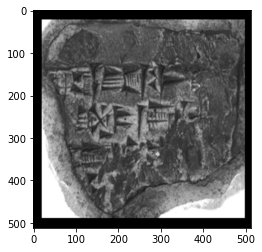

In [49]:
plt.imshow(ds_test2[21][0], cmap='gray')

In [70]:
ds_train[0][0]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

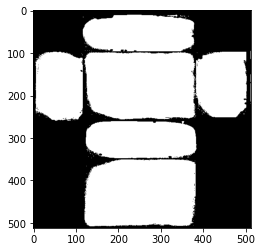

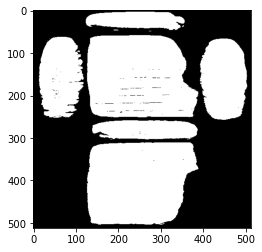

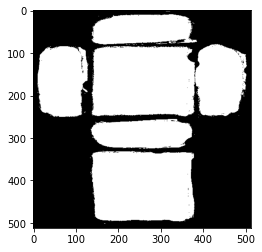

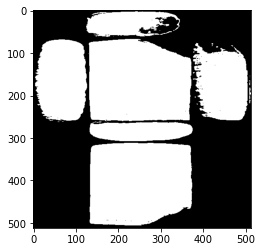

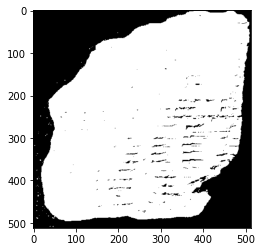

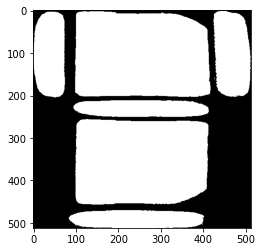

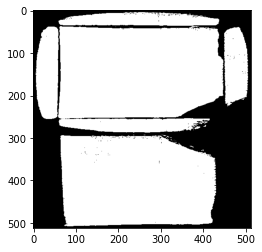

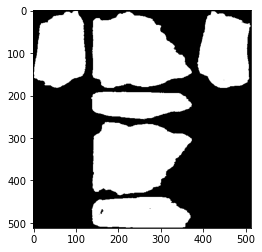

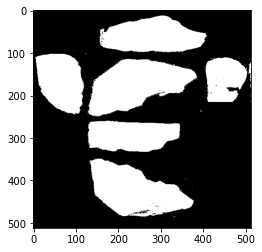

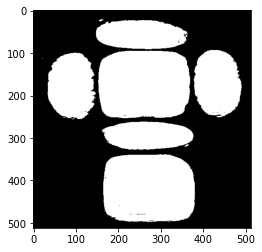

In [50]:
for idx in range(10, 20):
    
    X, y = ds_train[idx]
    X2, y2 = ds_train2[idx]
    plt.imshow(X, cmap='gray')

    plt.show()

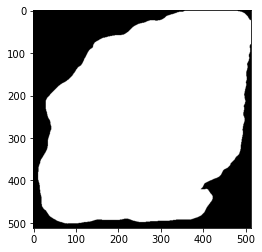

In [86]:
idx=14
X, y = ds_train[idx]
X2, y2 = ds_train2[idx]
plt.imshow(cv2.GaussianBlur(X2, (21,21), 0)>0.005, cmap='gray')


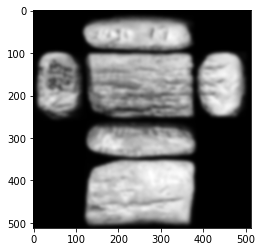

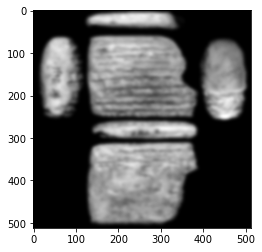

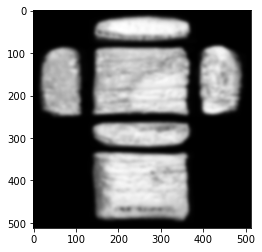

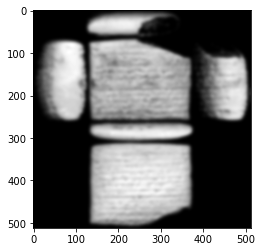

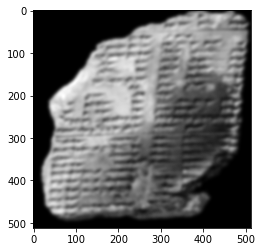

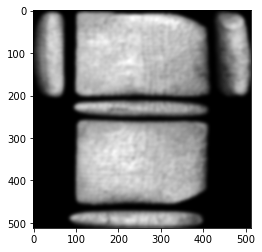

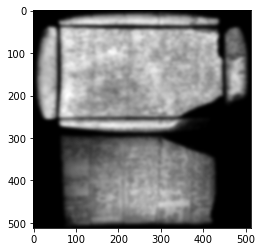

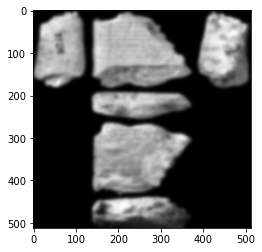

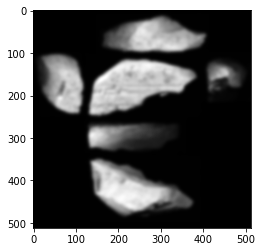

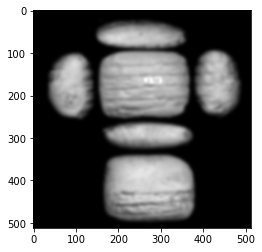

In [83]:
import cv2

for idx in range(10, 20):
    
    X, y = ds_train[idx]
    X2, y2 = ds_train2[idx]
    plt.imshow(cv2.GaussianBlur(X2, (21,21), 0), cmap='gray')

    plt.show()

In [56]:
from era_data import TabletEraDataset
from era_model import EraClassifier
from glob import glob
from era_data import TabletPeriodDataset
import pandas as pd
from matplotlib import pyplot as plt
from itertools import islice
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tqdm.auto import tqdm, trange
import numpy as np
import seaborn as sns
from torch.utils.data import DataLoader
from sklearn.linear_model import LogisticRegression

In [53]:
def extract_features(dl, MAX_N=None):
    outs = []
    with torch.no_grad():
        gen = tqdm(dl) if MAX_N is None else tqdm(islice(dl, MAX_N), total=MAX_N)
        for X, y in gen:
            model(X.to(device))
            outs.append(activation['ap'].cpu().numpy()[..., 0, 0])
    return np.vstack(outs)

In [54]:
dl_test = DataLoader(ds_test, batch_size=16, shuffle=False, num_workers=1)

In [57]:
feats = extract_features(dl_test)

  0%|          | 0/32 [00:00<?, ?it/s]

NameError: name 'model' is not defined

In [52]:
from sklearn.manifold import TSNE, Isomap

%time F2 = Isomap(n_components=10).fit_transform(feats)

NameError: name 'feats' is not defined

In [59]:
import cv2

In [62]:
cv2.GaussianBlur(ds_test[0][0])

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'GaussianBlur'
> Overload resolution failed:
>  - GaussianBlur() missing required argument 'ksize' (pos 2)
>  - GaussianBlur() missing required argument 'ksize' (pos 2)
